# Relation of Lunar Phase and Weather Events to Crime Incidents in Downtown Chicago

DBMS260_Final Project by 
Tracie Lindquist

There has long been speculation that there is a correlation between the number of crimes committed on a particular day and meteorological phenomena, such as precipitation, temperature, and moon phases. Studies conducted to attempt to find such a correlation have returned mixed results. One such study, completed in 1984 did find that the number of crimes committed on days in which the moon was full was significantly higer than the crime rate on days when the moon was in any other phase. They attributed this rise to a phenomenon they dubbed "human tidal waves", correlating this to the effect of lunar gravity on the water content of the human body (Sharma, 1984).

Further analysis completed in later studies, however, has been unable to corrobate the findings of this study. One such study reviewed police, astronomical, and weather data, for an unnamed city in the American southwest. The researchers concluded that

> "With few exceptions, the moon's phase was not related with the level of crime and disorder reported to the police." (Schafer, 2010)

In this project, I plan to examine crime and climatological data from the city of Chicago, IL to test whether the following hypotheses are true:

* Crime decreases on colder days
* Crime increases on warmer days
* Crime decreases on days with precipitation, regardless of precipitation type
* Crime increases on days when the moon is full

Since it is likey that the list of named crimes may become too cumbersome to visualize effectively, the final results will be filtered to a smaller list of crimes that are typically identifed as violent. That list will include, assault, battery, criminal sexual assault, and homicide.  


## Dataset Analysis

Three datasets will be used to complete this analysis. 

Several of these datasets are quite large, and one requires the addition of significant data in order to link it to the other two sets. I expect some challenges in normalizing and extracting data that will allow me to test my hypotheses. 

Descriptions of these datasets follows.  


**Chicago Downtown Wards Crime Data**

The Chicago Downtown Wards Crime Data dataset includes a listing all crimes for the time period between 10/27/2023 and 10/25/2024. This dataset has been filtered to include only police wards 3, 4, 42, and 43. These wards encompass many of the areas of downtown Chicago that are most often frequented by tourists, including Grant Park, Navy Pier, the Museum District, Michigan Ave, and Lakeshore Drive, River North. The dataset has been further filtered to contain only the following attributes: date, time of occurrence, block number street, primary description, secondary description, latitude, and longitude.  

 One final transformation required was to format the Date column as a datetime object, so that it can be used as an index to create a combined dataframe for later analysis. 

In [190]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import crime dataset
crime_data = pd.read_csv("ChicagoCrime_102023to102024_DowntownWards.csv")
crime_data["Date"] = pd.to_datetime(crime_data["Date"])
crime_data

,Date,TOC,Block,Street,PrimaryDescription,SecondaryDescription,Ward,Latitude,Longitude
0,2023-10-27,7:00,500,S State St,theft,from building,4,41.875200,-87.627600
1,2023-10-27,7:20,1000,N Lake Shore Dr,battery,simple,42,41.900900,-87.624200
2,2023-10-27,7:45,300,W Illinois St,theft,from building,42,41.890800,-87.636100
3,2023-10-27,8:00,2700,N Lake Shore Dr,motor vehicle theft,attempt - automobile,43,41.932400,-87.636400
4,2023-10-27,8:39,3400,S State St,battery,simple,3,41.832200,-87.626700
...,...,...,...,...,...,...,...,...,...
26281,2024-10-24,22:38,700,E Solidarity Dr,other offense,other vehicle offense,4,41.866441,-87.611786
26282,2024-10-24,23:55,0,W Hubbard St,theft,from building,42,41.890052,-87.628914
26283,2024-10-25,0:00,1500,S Wabash Ave,other offense,telephone threat,3,41.861335,-87.625690
26284,2024-10-25,0:00,500,W Fullerton Pkwy,theft,over $500,43,41.925563,-87.641815


Checking the data integrity reveals that the dataset contains 26286 rows.  10 rows are missing latitude and longitude data, which will only matter if I choose to include geological mapping of the dataset, which is not included in the original proposal. 

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26286 entries, 0 to 26285
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  26286 non-null  datetime64[ns]
 1   TOC                   26286 non-null  object        
 2   Block                 26286 non-null  int64         
 3   Street                26286 non-null  object        
 4   PrimaryDescription    26286 non-null  object        
 5   SecondaryDescription  26286 non-null  object        
 6   Ward                  26286 non-null  int64         
 7   Latitude              26276 non-null  float64       
 8   Longitude             26276 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


Taking a closer look at the raw data, we find that there were 26,286 total crimes reported for the period. There were 29 unuiqe crime types reported. The top crime was theft, with a 8,022 reported for the period.  

In [8]:
crime_data.PrimaryDescription.describe(include = "object")

count     26286
unique       29
top       theft
freq       8022
Name: PrimaryDescription, dtype: object

Visual analysis of counts for the top 10 crimes of any type is shown.  

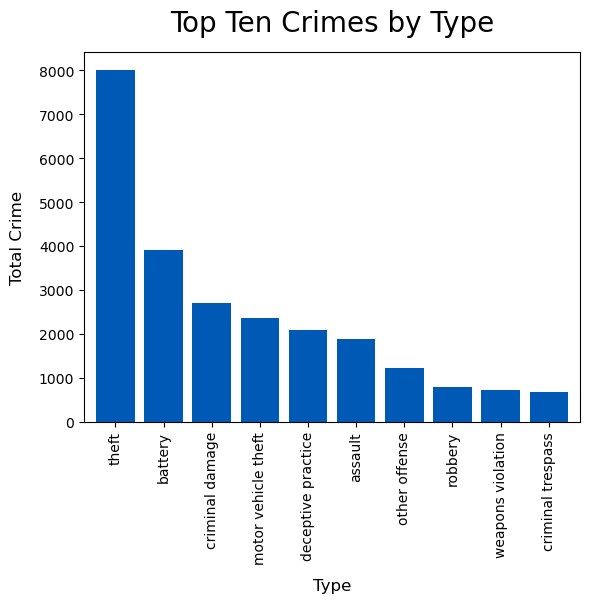

In [173]:
crime_data.PrimaryDescription.value_counts().head(10).plot(kind = "bar", width = 0.8, color = '#005AB5')
plt.xlabel("Type", labelpad = 10, fontsize = 12)
plt.ylabel("Total Crime", labelpad = 10, fontsize = 12)
plt. title ("Top Ten Crimes by Type", fontsize = 20, color = "black", pad = 15)
plt.show()

Since the original list of crimes is extensive, I chose to also take a look at the breakdown of crimes specifically defined as violent crimes.  That analysis revealed that the top violent crime in Chicago during the timeframe being evaluated is battery, follwed by assault. 

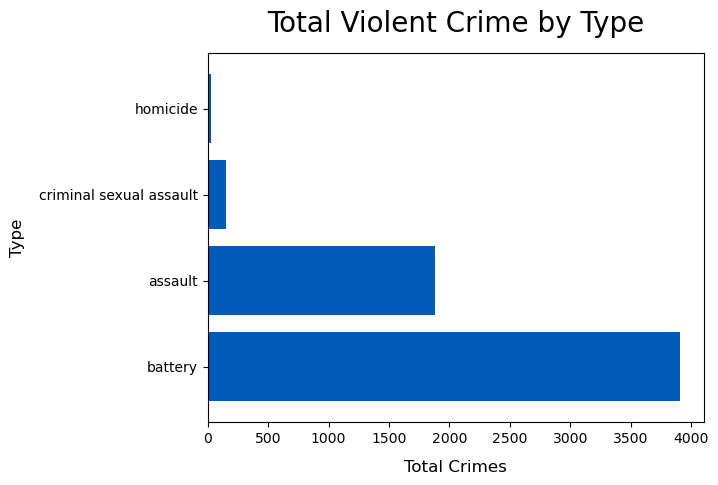

In [175]:
violent = ["assault", "battery", "criminal sexual assault", "homicide"]
counts = crime_data[crime_data["PrimaryDescription"].isin(violent)].PrimaryDescription.value_counts().plot(kind = "barh", width = 0.8, color = '#005AB5')
plt.xlabel("Total Crimes", labelpad = 10, fontsize = 12)
plt.ylabel("Type", labelpad = 10, fontsize = 12)
plt. title ("Total Violent Crime by Type", fontsize = 20, color = "black", pad = 15)
plt.show()

A breakdown of crime data by ward, shows that the majority of crimes are committed in Ward 42, which encompasses some of the most commonly visited tourist areas of Chicago, including Navy Pier, Grant Park, and River North. 

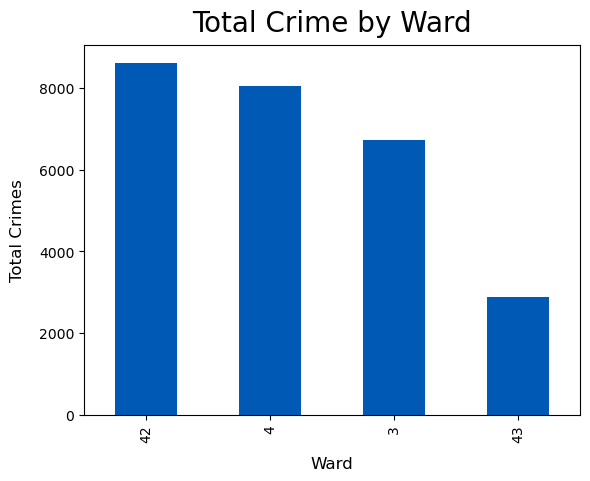

In [179]:
crime_data.Ward.value_counts().plot(kind = "bar", color = '#005AB5')
plt.xlabel("Ward", labelpad = 10, fontsize = 12)
plt.ylabel("Total Crimes", labelpad = 10, fontsize = 12)
plt. title ("Total Crime by Ward", fontsize = 20, color = "black", pad = 10)
plt.show()

**Moon Phase Data**

This dataset is from the US Navy Astronomical Applications Department [Link](https://aa.usno.navy.mil/calculated/moon/phases?date=2024-11-01&nump=50&format=p&submit=Get+Data). It includes dates/times of all full moons since 1981. This dataset has been filtered to include only dates between October of 2024 and October of 2025, with nominal data for the phase of the moon as follows: 1 = New Moon, 2 = First quarter, 3 = Full, 4 = Third Quarter.  One final transformation required was to format the Date column as a datetime object.

In [14]:
moon_phases=pd.read_csv("MoonPhases_102023to102025.csv")
moon_phases["Date"] = pd.to_datetime(moon_phases["Date"])
moon_phases

,Date,MoonPhase
0,2023-10-27,3
1,2023-10-28,3
2,2023-10-29,3
3,2023-10-30,3
4,2023-10-31,3
...,...,...
723,2025-10-19,4
724,2025-10-20,4
725,2025-10-21,1
726,2025-10-22,1


Checking the data integrity reveals that the dataset contains 727 rows with no missing data.

In [16]:
moon_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       728 non-null    datetime64[ns]
 1   MoonPhase  728 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


**Climatological Data**

This dataset is from NOAA’s National Centers for Environmental information that covers all weather stations in and around Chicago. For this analysis, it has been filtered to include date, precipitation, snow, snow depth, average temperature, max temperature, and min temperature for each date as recorded by the O'Hare International Airport station.  A column was added to track whether there was preciptiation recorded on any particulare date, with "1" indicating True. One final transformation required was to format the Date column as a datetime object.

In [198]:
weather = pd.read_csv("ChicagoWeather_OhareIntlAirport.csv")
weather["Date"] = pd.to_datetime(weather["Date"])
weather

,Date,PrecipitationAmt,Precip,Snow,SnowDepth,AvgTemp,MaxTemp,MinTemp
0,2023-10-27,0.07,1,0.0,0.0,67,72,45
1,2023-10-28,0.00,0,0.0,0.0,47,52,39
2,2023-10-29,0.01,1,0.0,0.0,46,47,39
3,2023-10-30,0.00,0,0.0,0.0,39,44,31
4,2023-10-31,0.03,1,0.9,0.0,34,38,30
...,...,...,...,...,...,...,...,...
360,2024-10-21,0.00,0,0.0,0.0,67,81,54
361,2024-10-22,0.01,1,0.0,0.0,65,73,55
362,2024-10-23,0.00,0,0.0,0.0,62,65,44
363,2024-10-24,0.21,1,0.0,0.0,52,64,40


Checking the integrity reveals that there are 365 records in the dataset with no nulls. 

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              365 non-null    datetime64[ns]
 1   PrecipitationAmt  365 non-null    float64       
 2   Precip            365 non-null    int64         
 3   Snow              365 non-null    float64       
 4   SnowDepth         365 non-null    float64       
 5   AvgTemp           365 non-null    int64         
 6   MaxTemp           365 non-null    int64         
 7   MinTemp           365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 22.9 KB


*Precipitation Data*

The table below provides statistical data for the 125 days in the dataset for which precipitation was recorded.  The data shows the following: 
* The mean precip amount was .266", with a miniumum of .0100" and a maximum of 1.64" with a standard deviation of 0.307
* The mean average temp for days with precipitation was 56.088, with a minimum of 12 and a maximum of 88 with a standard deviation of 17.046
* On days with snow, the mean snowfall amount was .17", with a minimum of 0.00 and a maximum of 4.7", with a mean snow depth of 0.311" and a maximum snow depth of 5.1".

In [200]:
PrecipAmt = weather[weather["PrecipitationAmt"] >0.001]
PrecipAmt["PrecipitationAmt"].describe()

count    125.000000
mean       0.266160
std        0.307563
min        0.010000
25%        0.030000
50%        0.150000
75%        0.400000
max        1.640000
Name: PrecipitationAmt, dtype: float64

*Temperature Data*

A review of the temperature data from the dataset shows that the mean average temperature during the period reviewed was 55 degrees, that the minimum temperature for the period reviewed was -7 and the maximum was 88. Days with temperatures below 40 degrees will be used as "cold days" and days with temperatures above 71 degrees will be considered "hot days" in later analysis. 

In [202]:
weather["AvgTemp"].describe()

count    365.000000
mean      55.013699
std       17.952848
min       -7.000000
25%       40.000000
50%       58.000000
75%       71.000000
max       88.000000
Name: AvgTemp, dtype: float64

## Evaluating The Hypotheses

The first step in evaluating the four hypotheses in this project is to create a combined dataframe using a series of merge() methods and left joins in Python, using the date column as the merge field.  The resulting dataset includes the original 26,286 rows and 17 columns. 

In [183]:
#create merged dataset
crime_moon = crime_data.merge(moon_phases, on = ("Date"), how = "left")
vis_data = crime_moon.merge(weather, on = ("Date"), how = "left")
vis_data["Date"] = pd.to_datetime(vis_data["Date"])
vis_data

,Date,TOC,Block,Street,PrimaryDescription,SecondaryDescription,Ward,Latitude,Longitude,MoonPhase,PrecipitationAmt,Precip,Snow,SnowDepth,AvgTemp,MaxTemp,MinTemp
0,2023-10-27,7:00,500,S State St,theft,from building,4,41.875200,-87.627600,3,0.07,1,0.0,0.0,67,72,45
1,2023-10-27,7:20,1000,N Lake Shore Dr,battery,simple,42,41.900900,-87.624200,3,0.07,1,0.0,0.0,67,72,45
2,2023-10-27,7:45,300,W Illinois St,theft,from building,42,41.890800,-87.636100,3,0.07,1,0.0,0.0,67,72,45
3,2023-10-27,8:00,2700,N Lake Shore Dr,motor vehicle theft,attempt - automobile,43,41.932400,-87.636400,3,0.07,1,0.0,0.0,67,72,45
4,2023-10-27,8:39,3400,S State St,battery,simple,3,41.832200,-87.626700,3,0.07,1,0.0,0.0,67,72,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26281,2024-10-24,22:38,700,E Solidarity Dr,other offense,other vehicle offense,4,41.866441,-87.611786,4,0.21,1,0.0,0.0,52,64,40
26282,2024-10-24,23:55,0,W Hubbard St,theft,from building,42,41.890052,-87.628914,4,0.21,1,0.0,0.0,52,64,40
26283,2024-10-25,0:00,1500,S Wabash Ave,other offense,telephone threat,3,41.861335,-87.625690,4,0.63,1,0.0,0.0,56,67,48
26284,2024-10-25,0:00,500,W Fullerton Pkwy,theft,over $500,43,41.925563,-87.641815,4,0.63,1,0.0,0.0,56,67,48


In [36]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26286 entries, 0 to 26285
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  26286 non-null  datetime64[ns]
 1   TOC                   26286 non-null  object        
 2   Block                 26286 non-null  int64         
 3   Street                26286 non-null  object        
 4   PrimaryDescription    26286 non-null  object        
 5   SecondaryDescription  26286 non-null  object        
 6   Ward                  26286 non-null  int64         
 7   Latitude              26276 non-null  float64       
 8   Longitude             26276 non-null  float64       
 9   MoonPhase             26286 non-null  int64         
 10  PrecipitationAmt      26286 non-null  float64       
 11  Precip                26286 non-null  int64         
 12  Snow                  26286 non-null  float64       
 13  SnowDepth       

The second step is to create the variable for the list of violent crimes.

In [28]:
#define list of violent crimes
violent_list = ["assault", "battery", "criminal sexual assault", "homicide"]

**Hypothesis 1 & 2 : Crime Decreases on Colder Days and Increases on Warmer Days**

The first hypotheses to test will for a potential correlation between the crime rate and the temperature in Chicago. 

The resulting bar chart seems to show that there is, in fact, more crime on days that are considered hot than on days that are considered cold. However, it also shows that reported incidents of violent crime are actually lower on both days that are considered cold and days that are considered hot than on days that are considered in the range of average. 

In [260]:
#define value counts of crimes by temperature
crime_average = vis_data[(vis_data ["AvgTemp"].between(40,70)) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_cold = vis_data[(vis_data["AvgTemp"]  <= 39) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_hot = vis_data[(vis_data["AvgTemp"]  >= 71) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()

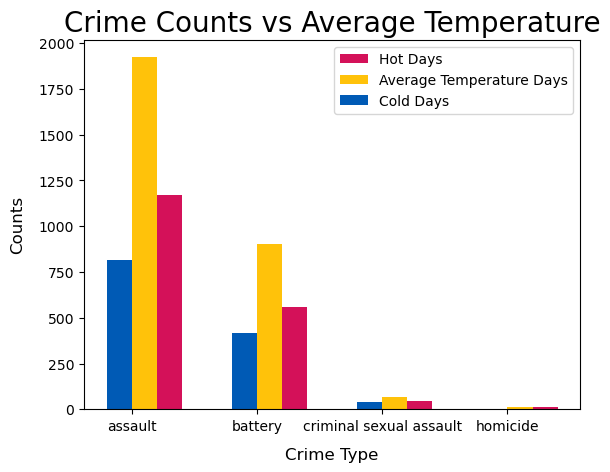

In [262]:
#plot values in bar chartplt.figure(figsize = (9,6))
plt.bar(violent_list, crime_hot, width = 0.4, color = '#D41159', align = 'edge', label = "Hot Days")
plt.bar(violent_list, crime_average, width = 0.2,color = '#FFC20A',align = 'edge', label = "Average Temperature Days")
plt.bar(violent_list, crime_cold, width = -0.2, color = '#005AB5', align = 'edge', label = "Cold Days")
plt.legend(frameon = True, facecolor = "white")
plt.xlabel("Crime Type", labelpad = 10, fontsize = 12)
plt.ylabel("Counts", labelpad = 10, fontsize = 12)
plt. title ("Crime Counts vs Average Temperature", fontsize = 20, color = "black")
plt.show()

**Hypotheses 3: Crime Decreases On Days With Preciptiation**

The third hypothesis to test is whether crime decreases on days with precipitation. 

The bar chart reflects that reported incidents of violent crime are actually lower on days with precipitation than on days without.


In [45]:
# define valuse counts of crimes committed on days where prcipitation occurred and where it did not
crime_precip = vis_data[(vis_data ["Precip"] == 1) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_noprecip = vis_data[(vis_data ["Precip"] == 0) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()

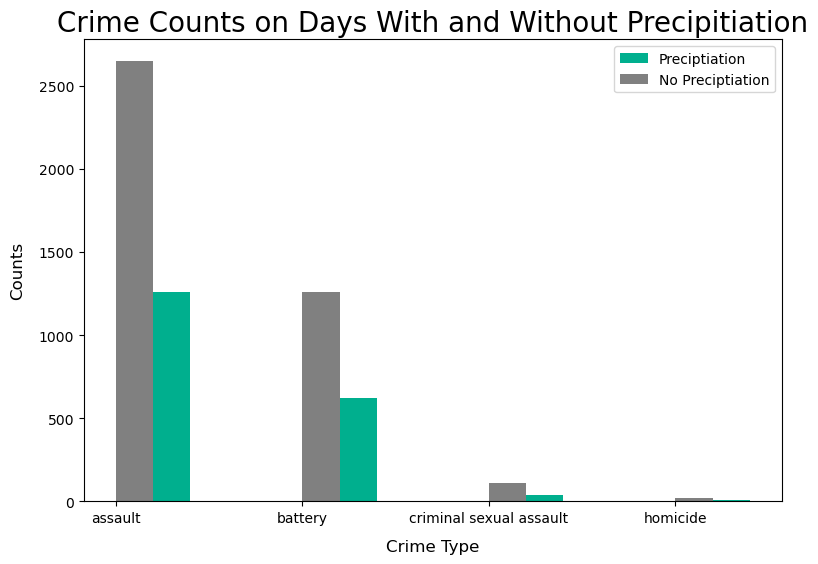

In [101]:
#plot values on bar chart
plt.figure(figsize = (9,6))
plt.bar(violent_list, crime_precip, width = 0.4, color = '#00AF8E', align = 'edge', label = "Preciptiation")
plt.bar(violent_list, crime_noprecip, width = 0.2,color = 'gray',align = 'edge', label = "No Preciptiation")
plt.legend(frameon = True, facecolor = "white")
plt.xlabel("Crime Type", labelpad =10, fontsize = 12)
plt.ylabel("Counts", labelpad = 10, fontsize = 12)
plt.title("Crime Counts on Days With and Without Precipitiation", fontsize = 20, color = "black")
plt.show()

**Hypothesis 4: Crime Increases When the Moon is Full**

The final hypothesis to test is whether crime increases on days with a full moon.  

I chose to try to visualize this data with a scatterplot. The scatterplot seems to reveal an interesting pattern: while there are significantly more instances of assault and battery on days with full moons, there is zero increase in homicides and an apparent decrease in criminal sexual assault.  

In order to better understand if this is actually the case, the data is also plotted in a bar chart. 

In [53]:
#define value counts of crimes by moon phase
crime_newmoon = vis_data[(vis_data ["MoonPhase"] == 1) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_firstquarter = vis_data[(vis_data ["MoonPhase"] == 2) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_fullmoon = vis_data[(vis_data ["MoonPhase"] == 3) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_lastquarter = vis_data[(vis_data ["MoonPhase"] == 4) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()

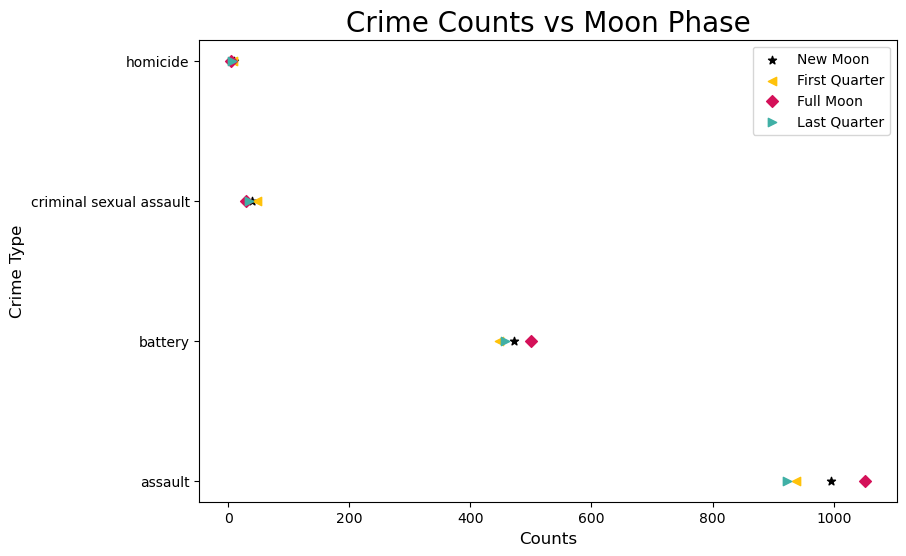

In [97]:
plt.figure(figsize = (9,6))
#scatterplot
plt.scatter(crime_newmoon, violent_list, marker = "*", color = 'black', label = "New Moon")
plt.scatter( crime_firstquarter, violent_list, marker = "<", color = '#FFC20A', label = "First Quarter")
plt.scatter( crime_fullmoon, violent_list, marker = "D", color = '#D41159', label = "Full Moon")
plt.scatter( crime_lastquarter, violent_list, marker = ">", color = '#40B0A6', label = "Last Quarter")
plt.legend(frameon = True, facecolor = "white")
plt.xlabel("Counts", fontsize = 12)
plt.ylabel("Crime Type", fontsize = 12)
plt.title("Crime Counts vs Moon Phase", fontsize = 20, color = "Black")
plt. show()

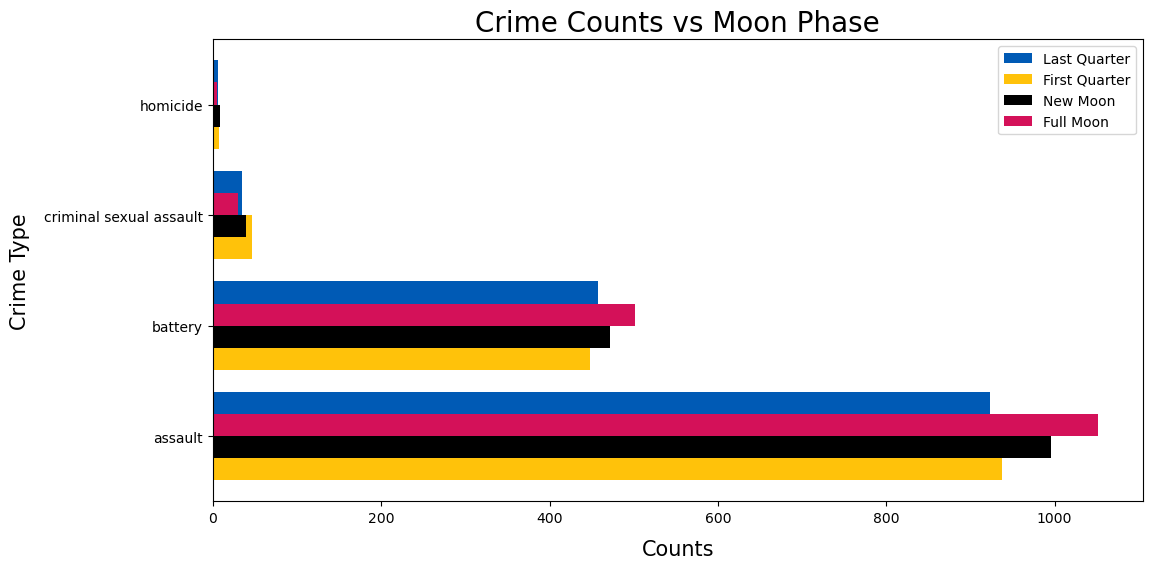

In [209]:
#barplot
plt.figure(figsize = (12,6))
plt.barh(violent_list, crime_lastquarter, height = 0.4, color = '#005AB5', align = 'edge', label = "Last Quarter")
plt.barh(violent_list, crime_firstquarter, height = -0.4, color ='#FFC20A', align = 'edge', label = "First Quarter")
plt.barh(violent_list, crime_newmoon, height = -0.2, color = 'black', align = 'edge', label = "New Moon")
plt.barh(violent_list, crime_fullmoon, height = 0.2, color = '#D41159', align = 'edge', label = "Full Moon")
plt.legend(frameon = True, facecolor = "white")
plt.ylabel("Crime Type", labelpad = 10, fontsize = 15)
plt.xlabel("Counts", labelpad = 10, fontsize = 15)
plt.title("Crime Counts vs Moon Phase", fontsize = 20, color = "Black")
plt.show()

## Conclusions

**Crime Decreases on Cold Days and Increases on Hot Days**

While the data did show that this hypotheis may be correct, it also shows that reported incidents of violent crime are actually lower on both days that are considered cold and that are considered hot than on days that are considered average. An investigation was completed to see if this there are more days in the average range than there are on hot and cold days. This investigation revealed that there were, indeed, nearly twice as many days during which the temperature fell in the average range than days when the temperature could be defined as either cold or hot. A more accurate comparison would require that the average temperature be limited to a more narrow range.

In [256]:
avg_temp_days = weather[(weather["AvgTemp"].between(40,70))].AvgTemp.value_counts().sum()
cold_days = weather[(weather["AvgTemp"]<= 39)].AvgTemp.value_counts().sum()
hot_days = weather[(weather["AvgTemp"]>= 71)].AvgTemp.value_counts().sum()
avg_temp_days, cold_days, hot_days

(180, 90, 95)

In [318]:
median = weather[(weather["AvgTemp"].between(40,70))].AvgTemp.median()
mean = weather[(weather["AvgTemp"].between(40,70))].AvgTemp.mean()
median, mean

(58.0, 55.83888888888889)

Limiting the range of average temperature days to days when the temperature is between 45 and 68 creates a more even distribution of numbers considered average, hot, and cold, and brings the median and mean values slightly closer together, indiciating this might be a better range to use for evaluation.

In [258]:
avg_temp_days = weather[(weather["AvgTemp"].between(45,68))].AvgTemp.value_counts().sum()
cold_days = weather[(weather["AvgTemp"]<= 46)].AvgTemp.value_counts().sum()
hot_days = weather[(weather["AvgTemp"]>= 68)].AvgTemp.value_counts().sum()
avg_temp_days, cold_days, hot_days

(128, 136, 115)

In [330]:
median = weather[(weather["AvgTemp"].between(45,68))].AvgTemp.median()
mean = weather[(weather["AvgTemp"].between(45,68))].AvgTemp.mean()
median, mean

(59.0, 57.7578125)

In [264]:
crime_average = vis_data[(vis_data ["AvgTemp"].between(45,68)) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_cold = vis_data[(vis_data["AvgTemp"]  <= 46) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()
crime_hot = vis_data[(vis_data["AvgTemp"]  >= 68) & (vis_data["PrimaryDescription"].isin(violent_list))].PrimaryDescription.value_counts()

Plotting the results for the updated average temperature range does reveal a potential correlation between an increase in crime and an increase in average temperature. 

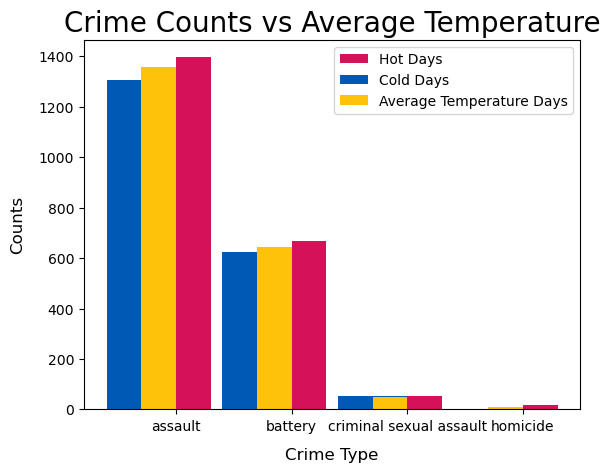

In [302]:
#plot values in bar chartplt.figure(figsize = (9,6))

plt.bar(violent_list, crime_hot, width = 0.3, color = '#D41159', align = 'edge', label = "Hot Days")
plt.bar(violent_list, crime_cold, width = -0.6, color = '#005AB5', align = 'edge', label = "Cold Days")
plt.bar(violent_list, crime_average, width = -0.3,color = '#FFC20A',align = 'edge', label = "Average Temperature Days")

plt.legend(frameon = True, facecolor = "white")
plt.xlabel("Crime Type", labelpad = 10, fontsize = 12)
plt.ylabel("Counts", labelpad = 10, fontsize = 12)
plt. title ("Crime Counts vs Average Temperature", fontsize = 20, color = "black")
plt.show()

**Crime Decreases on Days with Precipitation**

The data does indicate a potential correlation between a decrease in crime and precipitation.

**Crime Increases on Days When the Moon is Full**

A review of the data indicates that there was a slight increase in the number of reported incidents of violent crime on days when the moon is full for the period included in the dataset. 

**Final conclusion**

Since this dataset only encompasses 12 months of records, no definitve conclusions can drawn from this analysis.  Investigation of a larger dataset would be required. 

## References

Schafer, J.A., Varano, S.P., Jarvis, J.P., Cancino, J.M. (2010). Bad Moon on the Rise? Lunar Cycles and Incidents of Crime. *Journal of Criminal Justice. Vol.38,* pp.359-367. 

Thakur, C., Sharma, D. (1984, December 22). Full Moon and Crime. *British Medical Journal. Vol. 298,* pp. 1789-1791